INFO:root:Finish loading graphs.
INFO:root:Nodes train: 327
INFO:root:Simplicies train: 7818


number of simplices: 172035
number of unique simplices: 7818
Node index should begin with 0, reindexing the hypergraphs ...
number of nodes in construct graph 327


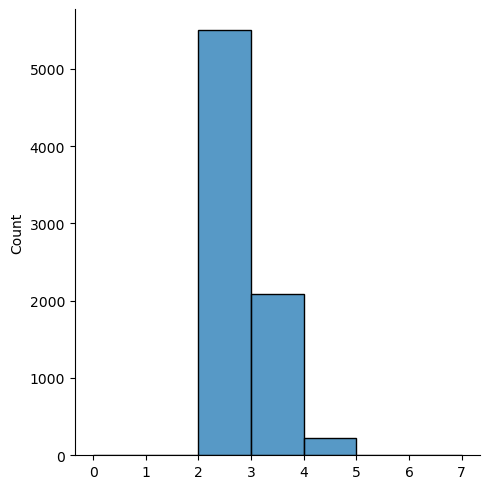

In [23]:
# load the hypergraph
import yaml
import logging
import os
import sys
import random

import numpy as np
import seaborn as sns
import networkx as nx

from utils import load_graphs
from cliques import compute_cliques


logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()
logger.setLevel(logging.INFO)

config  = yaml.safe_load(open('./config.yaml'))
config['dataset'] = 'contact-high-school'
config['beta'] = 20000
graphs = load_graphs(config, logger)


data = np.array([len(s) for s in graphs['simplicies_train']])
hist, bins = np.histogram(data, bins=np.linspace(1, 8, 8))
sns.displot(data, bins=range(8))

INFO:root:Start computing cliques
INFO:root:Found cache for max cliques train
INFO:root:Number of maximum cliques:6151
INFO:root:Optimizing clique sampler .. 
INFO:root:Found cache for rho.
INFO:root:[(2, 2), (3, 2), (23, 2), (4, 2), (5, 2), (7, 2), (4, 3), (15, 2)]
INFO:root:Optimize Clique Sampler: #hyperedges collected:4023, recall: 0.514581734458941, efficiency:0.20115
INFO:root:Clique analysis done.


(0, 0), (65, 65), (1091, 799), (1597, 1052), (4063, 2091), (8483, 2987), (15770, 3804), (17414, 3894), 
len of origin:19934, len of deduplicates： 5918


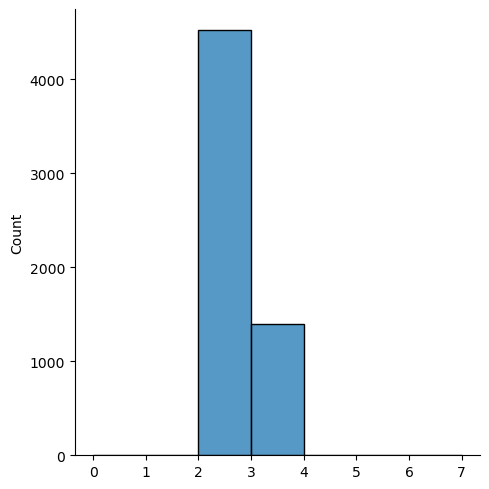

In [24]:
# # sampling cliques
# os.remove(f'{config['data_dir']}/{config['dataset']}/cliques_train.pkl')
# os.remove(f'{config['data_dir']}/{config['dataset']}/rho.pkl')

cliques = compute_cliques(graphs, config, logger)
sample_cliques_table = cliques['children_cliques_train']
# print(sample_cliques_table)

sample_cliques = []

for v in sample_cliques_table.values():
    sample_cliques = sample_cliques + v

sample_cliques = [list(c) for c in sample_cliques]
set_sample_cliques = list(set([tuple(sorted(e)) for e in sample_cliques]))
print(f'len of origin:{len(sample_cliques)}, len of deduplicates： {len(set_sample_cliques)}')

# random.shuffle(set_sample_hyperedges)
sample_clique_sizes = [len(c) for c in set_sample_cliques]
data = np.array(sample_clique_sizes)
hist, bins = np.histogram(data, bins=np.linspace(0, 5, 6))
sns.displot(data, bins=range(8))

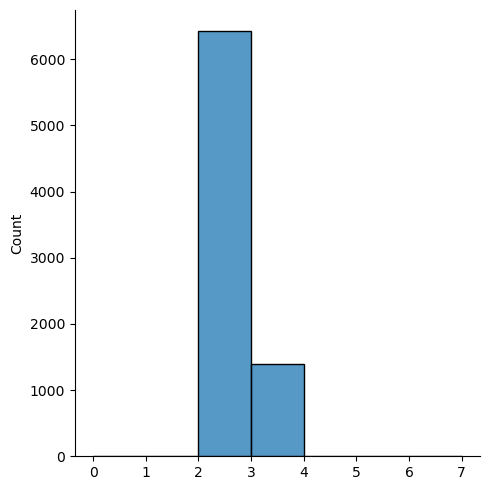

In [25]:
import utils
# from utils import lazy_clique_edge_cover
from importlib import reload
reload(utils)

# reconstruct the hypergraph by clique cover
G = graphs['G_weighted']

# YOU GUY!!!!!!!!!!!!!!!!!!!!!!
# BAD API!!!!!!!!!!!!!!!!!!!!!!
weighted_adjacency_matrix = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
reconstruct_hyperedges = utils.lazy_clique_edge_cover(weighted_adjacency_matrix, set_sample_cliques, len(graphs['simplicies_train']))
reconstruct_hyperedges_sizes = [len(e) for e in reconstruct_hyperedges]

data = np.array(reconstruct_hyperedges_sizes)
hist, bins = np.histogram(data, bins=np.linspace(0, 5, 6))
sns.displot(data, bins=range(8))

In [22]:
# print(reconstruct_hyperedges)
set_reconstruct_hyperedges = set([tuple(sorted(e)) for e in reconstruct_hyperedges])
print(f'len: {len(set_reconstruct_hyperedges)}, {set_reconstruct_hyperedges}')
print(f'len: {len(set_reconstruct_hyperedges)}, {set_reconstruct_hyperedges}')

precision, recall, f1, jaccard = utils.get_performance_wrt_ground_truth(set_reconstruct_hyperedges, graphs['simplicies_train'])
print(f'precision: {precision}, recall: {recall}, f1: {f1}, jaccard: {jaccard}')


len: 5918, {(247, 255), (49, 270), (35, 106), (76, 107), (34, 147), (199, 214), (81, 166, 276), (178, 260, 265), (74, 148, 293), (11, 149, 201), (148, 168), (160, 222), (27, 107), (48, 166), (139, 284), (254, 271), (106, 107), (127, 166), (48, 183, 213), (16, 106), (60, 208, 224), (59, 147, 183), (27, 120), (60, 126, 276), (11, 112), (131, 177), (222, 295), (34, 281), (87, 107), (106, 120), (133, 223), (37, 286), (171, 176, 291), (147, 198, 206), (154, 282), (37, 160, 285), (207, 293), (147, 160, 301), (173, 187), (1, 80), (279, 290), (58, 62), (41, 106, 134), (108, 179), (66, 182), (107, 258, 261), (291, 300), (82, 126), (290, 304), (147, 255), (59, 179), (58, 183), (3, 247), (75, 123), (126, 317), (92, 147, 158), (53, 72, 73), (80, 322), (63, 126), (271, 304), (57, 97, 192), (107, 177, 285), (77, 209), (178, 265, 301), (176, 188), (66, 230, 270), (198, 206), (130, 158, 183), (51, 156), (202, 325), (109, 134), (95, 199), (50, 145, 159), (141, 315), (24, 98, 148), (278, 320), (130, 193